In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from __future__ import print_function
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import statsmodels.formula.api as smf
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import graphviz
import pydotplus

In [3]:
os.chdir('/content/gdrive/My Drive/data/archive')
!pwd

/content/gdrive/My Drive/data/archive


In [4]:
train = pd.read_csv('train_after_scale.csv')
test = pd.read_csv('test_after_scale.csv')

print(train.shape)
print(test.shape)

(18644, 26)
(2067, 26)


In [5]:
# Save the target and data in X and y
# y = train['target']
# X = train.drop(['target'], axis = 1 )

X_train = train.drop('target', axis = 1)
y_train = train['target']

print("Length of the train dataset:")
print(len(X_train))
print(len(y_train))

print("Length of the test set:")
X_test = test.drop('target', axis = 1)
y_test = test['target']

print(len(X_test))
print(len(y_test))

Length of the train dataset:
18644
18644
Length of the test set:
2067
2067


# **1. K-Nearest Neighbors**

**Run the model for different n_neighbors,evaluate it and choose the best K Value**

In [6]:
def KNmodel(n):
  """Return the accuracy of the model for an input n_neighbors
  """
  model = neighbors.KNeighborsClassifier(n_neighbors = n, p = 2 , weights = 'distance')
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = 100*accuracy_score(y_test, y_pred).round(2)
  return accuracy

acc_list = [KNmodel(i) for i in np.arange(1,31,1)]

fig = go.Figure()
fig.add_trace(go.Scatter(y=acc_list, x=np.arange(1,31,1), marker_size=8,
                    mode='lines+markers',
                    name='lines+markers',
                    line = dict(color='tomato', width=2, dash='dash')))
fig.update_layout(title='KNN Accuracy vs Num of n_neighbors',
                   xaxis_title='Num of n_neighbors',
                   yaxis_title='Accuracy of the model')

fig.update_layout(template="simple_white", width=700, height=500)

fig.show()

In [7]:
def geterror(y_test, y_pred):   
    """
    Return 3 types of errors 
    """
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    print(f'mae: {mae}')
    print(f'mse: {mse}')
    print(f'rmse: {rmse}')

In [8]:
def KNmodel_error(n):
  """Return the accuracy of the model for an input n_neighbors
  """
  model = neighbors.KNeighborsClassifier(n_neighbors = n, p = 2 , weights = 'distance')
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  error = mean_squared_error(y_test, y_pred)
  return error

error = [KNmodel_error(i) for i in np.arange(1,31,1)]

#Plot the K Value MAE
fig = go.Figure()
fig.add_trace(go.Scatter(y=error, x=np.arange(1,31,1), marker_size=10, marker_color='#06436C',
                    mode='lines+markers',
                    name='MSE according to K',
                    line = dict(color='tomato', width=2, dash='dash')))
fig.add_trace(go.Scatter(x=[19], y=[error[18]], mode = 'markers',
                         marker_symbol = 'circle',
                         marker_size = 12, name="Chosen K", marker_color="red"))
fig.update_layout(title='K Value MAE',
                   xaxis_title='K Value',
                   yaxis_title='Mean Absolute Error')
fig.update_layout(template="simple_white", width=800, height=500)

fig.show()

**Choose K = 19**


In [9]:
#Choose n_neighbors to be 19 which return the highest stable exactness 
model = neighbors.KNeighborsClassifier(n_neighbors = 19, p = 2, weights = 'distance')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy of 19KNN: {} %".format(100*accuracy_score(y_test, y_pred).round(2)))

Accuracy of 19KNN: 75.0 %


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84      1504
         1.0       0.56      0.34      0.43       563

    accuracy                           0.75      2067
   macro avg       0.67      0.62      0.63      2067
weighted avg       0.72      0.75      0.73      2067



In [11]:
blyl = ['#003d6a', '#06436c', '#4895c7', '#81c7c7', '#b1d8d8', '#fae6ba', '#f7d084', '#ffcf60']
fig = px.imshow(confusion_matrix(y_test, y_pred), text_auto=True, color_continuous_scale=blyl)
fig.update_layout(width=400, height=400)
fig.update_layout(xaxis_title='Predicted label',
                   yaxis_title='True label')

fig.update_traces(text=confusion_matrix(y_test, y_pred), textfont={"size":18})
fig.show()

# **2. Logistic Regression**

In [12]:
logistic = LogisticRegression(random_state=123,solver='liblinear', penalty='l2', max_iter=5000)
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
print("Accuracy of Logistic Regression: {} %".format(100*logistic.score(X_test, y_test).round(2)))

Accuracy of Logistic Regression: 75.0 %


In [13]:
train_col_names = train.columns.tolist()
train_col_names.remove('target')
coef = pd.DataFrame(logistic.coef_, columns = train_col_names).T
coef.columns = ['Coefficient']
coef

,Coefficient
city_development_index,-0.706075
gender_Male,-0.019762
gender_Unknown,-0.001907
gender_Female,0.031517
gender_Other,0.021854
relevent_experience,-0.118097
enrolled_university,0.103132
education_level,-0.128343
major_discipline_STEM,0.163610
major_discipline_Business Degree,0.074524


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.93      0.84      1504
         1.0       0.58      0.27      0.37       563

    accuracy                           0.75      2067
   macro avg       0.68      0.60      0.60      2067
weighted avg       0.72      0.75      0.71      2067



In [15]:
fig = px.imshow(confusion_matrix(y_test, y_pred), text_auto=True, color_continuous_scale=blyl)
fig.update_layout(width=400, height=400)
fig.update_layout(xaxis_title='Predicted label',
                  yaxis_title='True label')

fig.update_traces(text=confusion_matrix(y_test, y_pred), textfont={"size":18})
fig.show()

# **3. Dimensionality Reduction (PCA)**

**Extract Principal Components from train set only  and apply that to both sets**

In [16]:
# # With N Components = 9
# pca = PCA(n_components=9)
# principalComponents = pca.fit(X_train)

# # Explained Variance Ratio
# pca_X_train = pca.transform(X_train)
# principalDF_train = pd.DataFrame(data = pca_X_train, columns = [f'principal component {i}' for i in range(9)])
# # pca.explained_variance_ratio_*100

# pca_X_test = pca.transform(X_test)
# principalDF_test = pd.DataFrame(data = pca_X_test, columns = [f'principal component {i}' for i in range(9)])
# principalDF_test.head()

**Applying features extracted data in 2 different model (Logistic Regression and Decision Tree Classifier)**

In [17]:
# print(pca_X_train.shape)
# print(pca_X_test.shape)

In [18]:
#Applying model after PCA (Logistic Regression)

def model_pca_reg(n):
    pca = PCA(n_components=n, random_state = 42)
    principalComponents = pca.fit(X_train)
    pca_X_train = pca.transform(X_train)
    pca_X_test = pca.transform(X_test)
    
    model = LogisticRegression(random_state=123,solver='liblinear', penalty='l2', max_iter=5000)
    model.fit(pca_X_train,y_train)
    
    return model.score(pca_X_test,y_test)

In [19]:
# Training Logistic Regression model with different PCA components
scores = []
for i in range(1,26):
    scores.append(model_pca_reg(i))
fig = go.Figure()
fig.add_trace(go.Scatter(y=scores, x=np.arange(1,26,1), marker_size=1, marker_color='#4895c7',
                    mode='lines+markers',
                    name='Accuracy',
                    line = dict(color='#4895c7', width=3)))
fig.add_trace(go.Scatter(x=[7], y=[scores[6]], mode = 'markers',
                         marker_symbol = 'circle',
                         marker_size = 12, name="Highest accuracy", marker_color="red"))
fig.update_layout(title='Applying Logistic Regression after PCA',
                   xaxis_title='PCA N Components',
                   yaxis_title='Accuracy')
fig.update_layout(template="simple_white", width=800, height=500)

fig.show()

In [20]:
#Investigae mean absolute errror
def model_pca_reg_er(n):
    pca = PCA(n_components=n, random_state = 42)
    principalComponents = pca.fit(X_train)
    pca_X_train = pca.transform(X_train)
    pca_X_test = pca.transform(X_test)
    
    model = LogisticRegression(random_state=123,solver='liblinear', penalty='l2', max_iter=5000)
    model.fit(pca_X_train,y_train)
    y_pred = model.predict(pca_X_test)
    
    return mean_absolute_error(y_test, y_pred)

In [21]:
pca_error = [model_pca_reg_er(i) for i in range(1,26)]

#Plot the PCA MAE
fig = go.Figure()
fig.add_trace(go.Scatter(y=pca_error, x=np.arange(1,26,1), marker_size=10, marker_color='#06436C',
                    mode='lines+markers',
                    name='MSE according to n_components',
                    line = dict(color='tomato', width=3, dash='dash')))
fig.add_trace(go.Scatter(x=[7], y=[pca_error[6]], mode = 'markers',
                         marker_symbol = 'circle',
                         marker_size = 12, name="Chosen n_components", marker_color="red"))
fig.update_layout(title='Mean Absolute Error of Logistic Regression (PCA)',
                   xaxis_title='n_components',
                   yaxis_title='Mean Absolute Error')
fig.update_layout(template="simple_white", width=900, height=500)

fig.show()

Turns out n_components = 7 gives the highest score and lowest MAE. In the other hand, logistic regression model still gives the same accuracy as that before applying PCA. 

In [22]:
import contextlib
import time

#Define a context manager to get the run time for the model
@contextlib.contextmanager
def timer():
  begin = time.time()
  yield
  end = time.time()
  print("This took {:.2f} seconds".format(end - begin))

with timer():
  logistic = LogisticRegression(random_state=123,solver='liblinear', penalty='l2', max_iter=5000)
  logistic.fit(X_train, y_train)
  y_pred = logistic.predict(X_test)
  print("Accuracy of Logistic Regression: {} %".format(100*logistic.score(X_test, y_test).round(2)))


#Set n_components = 7
pca = PCA(n_components=7, random_state = 42)
principalComponents = pca.fit(X_train)
pca_X_train = pca.transform(X_train)
pca_X_test = pca.transform(X_test)

with timer():
  model = LogisticRegression(random_state=123,solver='liblinear', penalty='l2', max_iter=5000)
  model.fit(pca_X_train,y_train)
  print("Accuracy of Logistic Regression (with PCA: n_components = 7): {} %".format(100*model.score(pca_X_test, y_test).round(2)))

Accuracy of Logistic Regression: 75.0 %
This took 0.09 seconds
Accuracy of Logistic Regression (with PCA: n_components = 7): 75.0 %
This took 0.08 seconds


In [23]:
#Call the classification report for Logistic Regression (applied PCA, n_components = 7)
pca = PCA(n_components=7, random_state = 42)
principalComponents = pca.fit(X_train)
pca_X_train = pca.transform(X_train)
pca_X_test = pca.transform(X_test)
    
model = LogisticRegression(random_state=123,solver='liblinear', penalty='l2', max_iter=5000)
model.fit(pca_X_train,y_train)
y_pred = model.predict(pca_X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.96      0.85      1504
         1.0       0.65      0.21      0.31       563

    accuracy                           0.75      2067
   macro avg       0.71      0.58      0.58      2067
weighted avg       0.73      0.75      0.70      2067



# **4. Decision Tree Classifier**

In [24]:
X_train = train.drop('target', axis = 1)
y_train = train['target']

X_test = test.drop('target', axis = 1)
y_test = test['target']

print(X_train.shape)

(18644, 25)


In [25]:
my_model = DecisionTreeClassifier(max_depth = 5,random_state  = 123)    #Try max_depth = 3
my_model.fit(X_train, y_train)
print("Accuracy Score of Decision Tree: ", my_model.score(X_test, y_test)) 
y_predict = my_model.predict(X_test)

Accuracy Score of Decision Tree:  0.7760038703434929


In [26]:
#print confusion matrix for y_test and y_predict
fig = px.imshow(confusion_matrix(y_test, y_predict), text_auto=True, color_continuous_scale=blyl)
fig.update_layout(width=400, height=400)
fig.update_layout(xaxis_title='Predicted label',
                  yaxis_title='True label')
fig.update_traces(text=confusion_matrix(y_test, y_pred), textfont={"size":18})
fig.show()

In [27]:
text_representation = tree.export_text(my_model)
print(text_representation)

|--- feature_0 <= -1.66
|   |--- feature_15 <= -1.27
|   |   |--- feature_5 <= -0.49
|   |   |   |--- feature_24 <= -0.09
|   |   |   |   |--- feature_24 <= -0.64
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_24 >  -0.64
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_24 >  -0.09
|   |   |   |   |--- feature_6 <= 0.08
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_6 >  0.08
|   |   |   |   |   |--- class: 1.0
|   |   |--- feature_5 >  -0.49
|   |   |   |--- feature_6 <= 1.30
|   |   |   |   |--- feature_23 <= 1.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_23 >  1.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_6 >  1.30
|   |   |   |   |--- feature_22 <= 2.93
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_22 >  2.93
|   |   |   |   |   |--- class: 1.0
|   |--- feature_15 >  -1.27
|   |   |--- feature_24 <= 0.38
|   |   |   |--- feature_13 <= 4.54
|   |   |   |   |--- feature_24 <=

For Decision Tree, n_components = 9 gives the highest accuracy. We will take that parameter to plot our tree later.

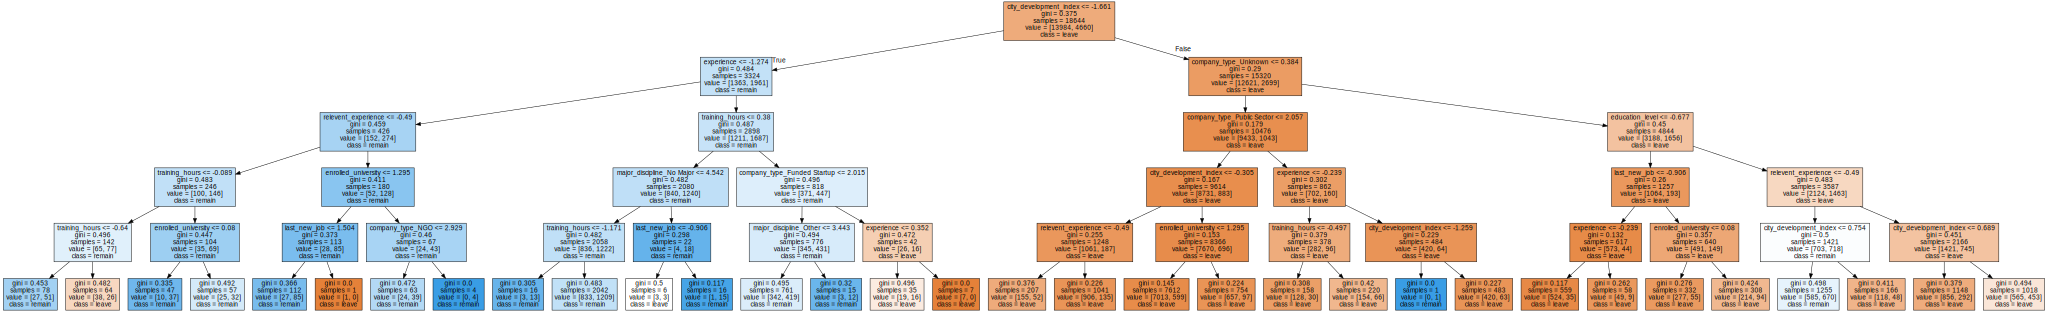

<Figure size 720x360 with 0 Axes>

In [28]:
features = train.columns.tolist()
features.remove('target')
fig = plt.figure(figsize=(10,5))
# DOT data
dot_data = tree.export_graphviz(my_model, out_file=None, 
                                feature_names=features,  
                                class_names=['leave','remain'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [29]:
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('tree.png')

True